In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

The plan is to re-create figure 3 of [Saxe, McClelland and Ganguly](https://arxiv.org/pdf/1312.6120v3.pdf), but have
a go with a ReLU rather than a tanh as that is more interesting practically.

The first thing to do is to try to plot the analytical curve:
$$
    u_f(t) = \frac{se^{\frac{2st}{\tau}}}{e^{\frac{2st}{\tau}} - 1 + \frac{s}{u_0}}
$$ for small $u_0$. From the paper, we'll try $t$ from $0$ to around $1200$. To get $s$ we need some data, it is a
singular value of the data correlation matrix. For now we'll just plug in a couple of numbers and see if it looks about right.

In [2]:
def curve(t, s, tau, u_nought):
    """only one s at a time"""
    exps = np.exp((2*s*t) / tau)
    return (s * exps) / (exps - 1 + s/u_nought)

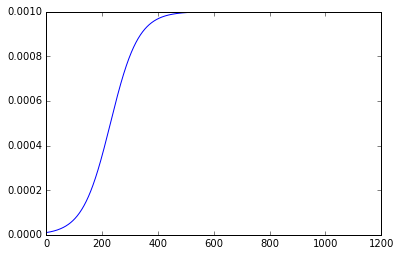

In [16]:
time = np.arange(1200.0)
s = 0.001
tau = 0.1
u_nought = 0.00001

y = curve(time, s, tau, u_nought)

plt.plot(time, y)

Could be worse, let's go ahead and make some real data. The data used for this figure was apparently generated according to a procedure described in a [different paper](http://www-psych.stanford.edu/~jlm/papers/SaxeMcCGanguli13CogSciProc.pdf) by the same authors.

The data is described as follows:
>The training set consists of 32 orthogonal input patterns, each
>associated with a 1000-dimensional feature vector generated by a hierarchical diffusion process described
>in [16] with a five level binary tree and flip probability of 0.1 

The hierarchical diffusion process is indeed described in the other paper, and it is slightly odd. At first, however,
we note that all we know about the training data is that the outputs have $1000$ dimensions and there are 32 patterns.
That there are 32 patterns necessarily corresponds to the binary tree process used to generate the data, but we have no idea at all how big the input patterns are.

The procedure is as follows:
- generate a binary tree with one leaf node per output pattern
- for each feature do:
    - set the root node to 1 or -1 with probability 0.5
    - while not at the lowest level
        - propagate the value of each node in the higher level to its children
        - with probability $\epsilon$ flip the value
        
        
        
Making this work out should not be crazy, but might be a little bit unpleasant. The procedure we are going to use is the following:
- allocate the appropriate amount of space
- get down to the first level, make sure the values are in the middle.
- alternate 1d convolutions and random flipping until we are done.

In [ ]:
def flip(data, epsilon):
    """randomly flip the signs with probability epsilon"""
    